In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture # For clustering 
import types
import plotly as py
import plotly.graph_objs as go

In [25]:
df = pd.read_csv('C:/Users/Murtaza/OneDrive/Documents/Datasets/Masters/Data Mining n Warehousing/Data/Exam/2019.csv')
df

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
# Data Size
df.shape

(156, 9)

In [4]:
# Some data analysis
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
# Data types
df.dtypes

Happiness Rank                     int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

In [6]:
#Check for null values
df.isnull().sum()

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64

In [7]:
dataPlot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})

map = go.Figure(data=[dataPlot])
py.offline.plot(map)

'file://C:\\Users\\Murtaza\\OneDrive\\Documents\\Datasets\\Masters\\Data Mining n Warehousing\\temp-plot.html'

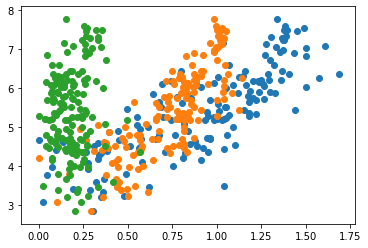

<Figure size 864x720 with 0 Axes>

In [8]:
# as we know now features like health economy and dystpia residue affect the most 
# so let's do indivisual test with happiness and the 3 features 
year = df['Happiness Score']
plt.scatter(df['Economy (GDP per Capita)'],year)
plt.scatter(df['Health (Life Expectancy)'],year)
plt.scatter(df['Generosity'],year)
plt.figure(figsize=(12,10))
plt.show()

In [9]:
country=df[df.columns[0]]
data= df.iloc[:,2:]

In [10]:
def normalizedData(x):
    normalised = StandardScaler()
    normalised.fit_transform(x)
    return(x)

In [11]:
data = normalizedData(data)

KMeans

In [12]:
n_clusters=3
def Kmeans(x, y):
    km= cluster.KMeans(x)
    km_result=km.fit_predict(y)
    return(km_result)

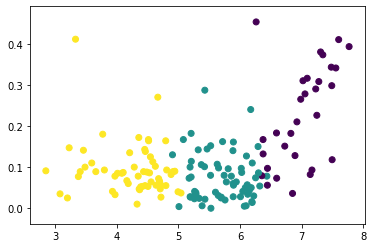

In [13]:
km_result = Kmeans(n_clusters,data)
data['Kmeans'] = pd.DataFrame(km_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 6],  c=km_result)
plt.show() 

In [14]:
dataset=pd.concat([data,country],axis=1)
dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Kmeans,Happiness Rank
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,2
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,3
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,4
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,5
...,...,...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2,152
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2,153
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2,154
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2,155


In [15]:
dataPlot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = dataset['Kmeans'],
           text = df['Country'],
           colorbar = {'title':'Happiness'})

map = go.Figure(data=[dataPlot])
py.offline.plot(map)

'file://C:\\Users\\Murtaza\\OneDrive\\Documents\\Datasets\\Masters\\Data Mining n Warehousing\\temp-plot.html'

Mean Shift

In [16]:
def MeanShift(x,y):
    ms=cluster.MeanShift(x)
    ms_result=ms.fit_predict(y)
    return(ms_result)

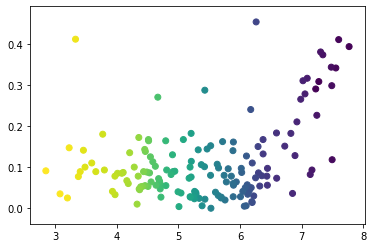

In [17]:
ms_result=MeanShift(0.1,data)
data['MeanShift'] = pd.DataFrame(ms_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 6],  c=ms_result)
plt.show()

In [18]:
dataset=pd.concat([data,country],axis=1)
dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Kmeans,MeanShift,Happiness Rank
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,1,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,2,2
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,3,3
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,4,4
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,5,5
...,...,...,...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2,150,152
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2,151,153
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2,152,154
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2,153,155


In [19]:
dataPlot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = dataset['MeanShift'],
           text = df['Country'],
           colorbar = {'title':'Happiness'})

map = go.Figure(data=[dataPlot])
py.offline.plot(map)

'file://C:\\Users\\Murtaza\\OneDrive\\Documents\\Datasets\\Masters\\Data Mining n Warehousing\\temp-plot.html'

Gaussian Mixture Clustering

In [20]:
def gmm(x, y):
    gm=mixture.GaussianMixture(n_components=x,covariance_type='full')
    gm.fit(y)
    gm_result=gm.predict(y)
    return(gm_result)

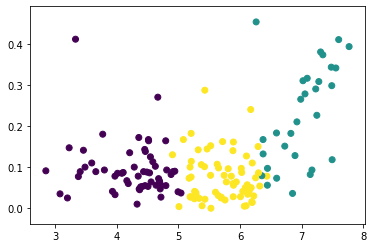

In [21]:
gm_result = gmm(3,data)
data['gmm'] = pd.DataFrame(gm_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 6],  c=gm_result)
plt.show()

In [22]:
dataset=pd.concat([data,country],axis=1)
dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Kmeans,MeanShift,gmm,Happiness Rank
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,1,1,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,2,1,2
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,3,1,3
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,4,1,4
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2,150,0,152
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2,151,0,153
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2,152,0,154
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2,153,0,155


In [23]:
dataPlot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = dataset['gmm'],
           text = df['Country'],
           colorbar = {'title':'Happiness'})

map = go.Figure(data=[dataPlot])
py.offline.plot(map)

'file://C:\\Users\\Murtaza\\OneDrive\\Documents\\Datasets\\Masters\\Data Mining n Warehousing\\temp-plot.html'